# IMPORT THE LIBRARIES

In [1]:
#Import necessary libraries for data manipulation, visualization, preprocessing, and modeling.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# READ THE DATASET

In [2]:
# Load the dataset containing crop yield data and display the first 5 rows.
data=pd.read_csv("crop_yield.csv")
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


# DATA ANALYSIS

In [3]:
# Display the shape of the dataset 
data.shape

(1000000, 10)

In [4]:
# Display information about the dataset, including data types and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
# Show descriptive statistics for the dataset.
data.describe(include=["object","float64","bool","int64"])

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


In [6]:
# Check for missing values in each column.
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
# Check for duplicate rows in the dataset.
data.duplicated().sum()

0

In [8]:
# Seeing object type columns from the dataset for further analysis.
obj_columns = data.select_dtypes(include=['object'])
obj_columns

,Region,Soil_Type,Crop,Weather_Condition
0,West,Sandy,Cotton,Cloudy
1,South,Clay,Rice,Rainy
2,North,Loam,Barley,Sunny
3,North,Sandy,Soybean,Rainy
4,South,Silt,Wheat,Cloudy
...,...,...,...,...
999995,West,Silt,Rice,Sunny
999996,South,Chalky,Barley,Rainy
999997,North,Peaty,Cotton,Cloudy
999998,West,Silt,Wheat,Sunny


In [9]:
# Count unique values for each column in the dataset.
data.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

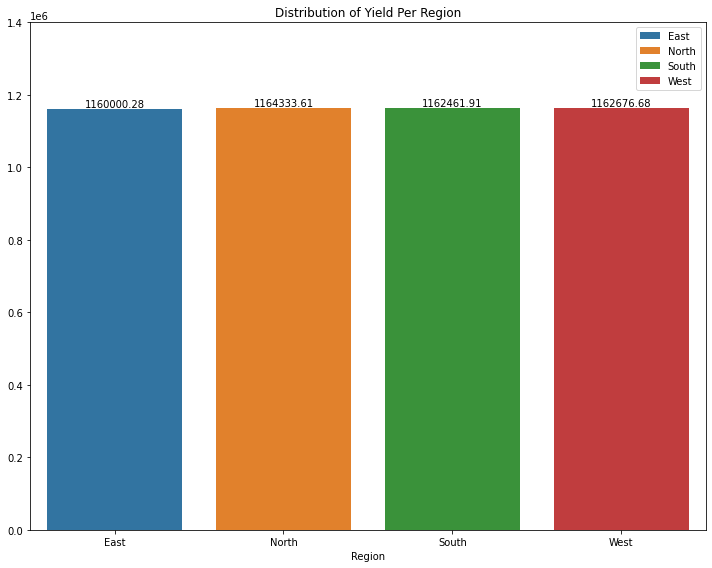

In [10]:
# Set up the figure and group the data by "Region" to calculate total yield.
plt.figure(figsize=(10,8))
grouped_region = data.groupby("Region")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per region and add labels on each bar.
plot = sns.barplot(y=grouped_region.values, x=grouped_region.index, dodge=False, hue=grouped_region.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Region")
plt.legend(loc="upper right")
plt.ylim(0, 1400000)
plt.tight_layout()

# Display the plot.
plt.show()

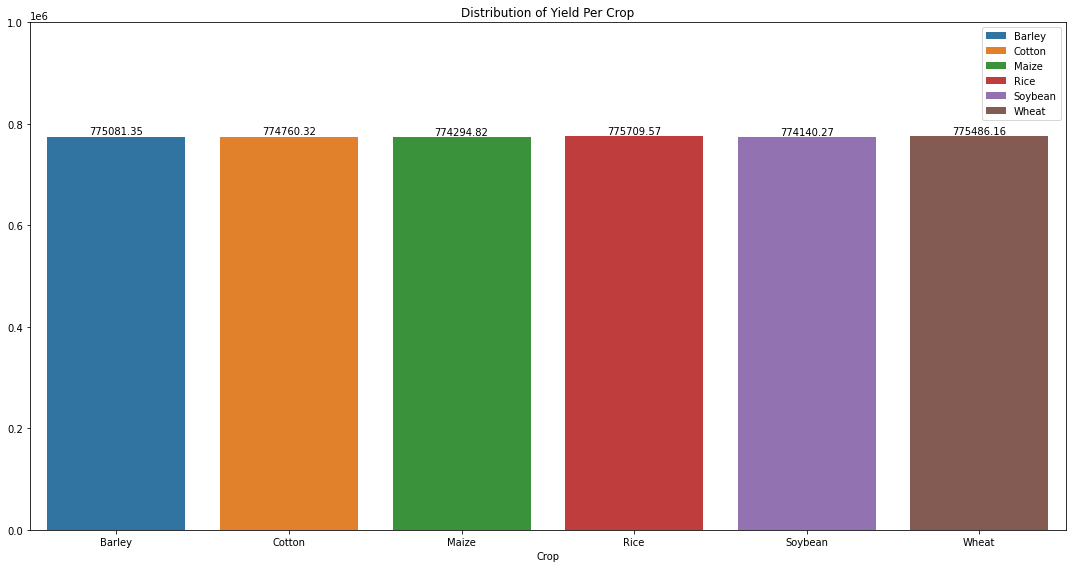

In [11]:
# Set up the figure and group the data by "Crop" to calculate total yield.
plt.figure(figsize=(15,8))
grouped_crop = data.groupby("Crop")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per crop and add labels on each bar.
plot = sns.barplot(y=grouped_crop.values, x=grouped_crop.index, dodge=False, hue=grouped_crop.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Crop")
plt.legend(loc="upper right")
plt.ylim(0, 1000000)

# Adjust the layout for a clean presentation of the plot.
plt.tight_layout()

# Display the plot.
plt.show()

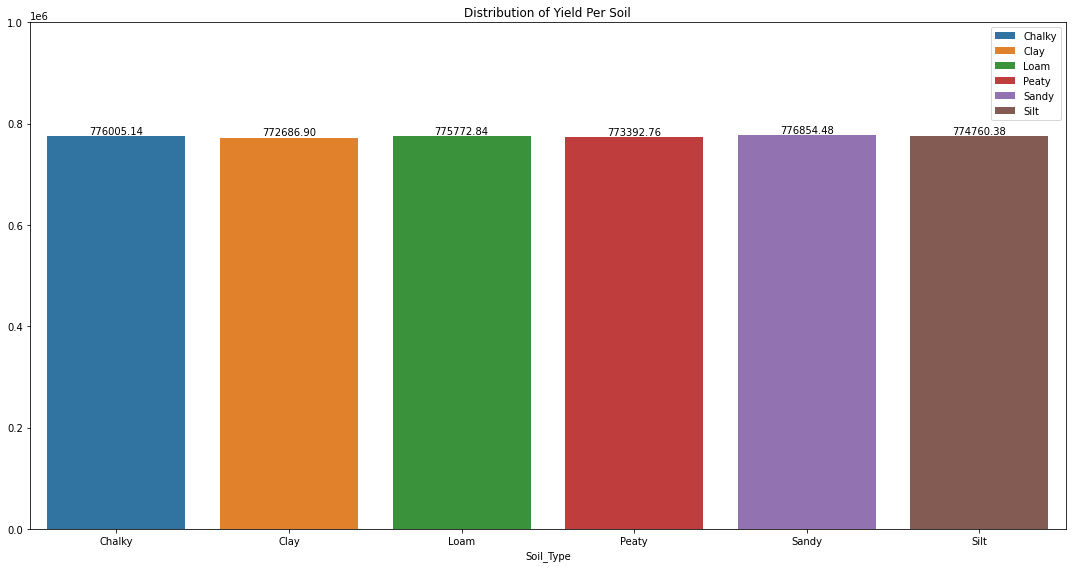

In [12]:
# Set up the figure and group the data by "Soil_Type" to calculate total yield.
plt.figure(figsize=(15,8))
grouped_soil = data.groupby("Soil_Type")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per soil type and add labels on each bar.
plot = sns.barplot(y=grouped_soil.values, x=grouped_soil.index, dodge=False, hue=grouped_soil.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Soil")
plt.legend(loc="upper right")
plt.ylim(0, 1000000)

# Adjust the layout for a clean presentation of the plot.
plt.tight_layout()

# Display the plot.
plt.show()

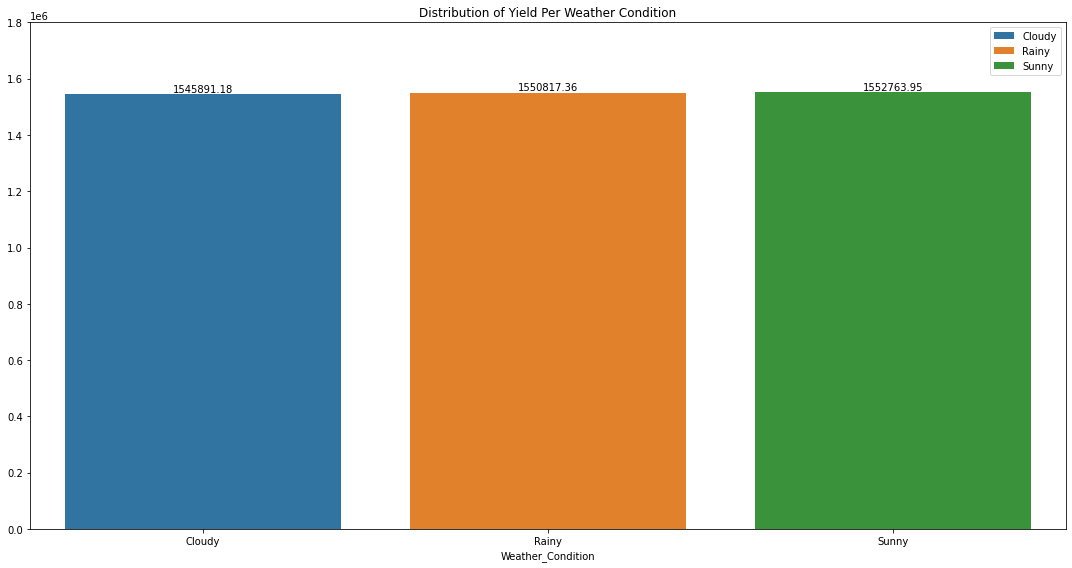

In [13]:
# Set up the figure and group the data by "Weather_Condition" to calculate total yield.
plt.figure(figsize=(15,8))
grouped_weather = data.groupby("Weather_Condition")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per weather condition and add labels on each bar.
plot = sns.barplot(y=grouped_weather.values, x=grouped_weather.index, dodge=False, hue=grouped_weather.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Weather Condition")
plt.legend(loc="upper right")
plt.ylim(0, 1800000)

# Adjust the layout for a clean presentation of the plot.
plt.tight_layout()

# Display the plot.
plt.show()

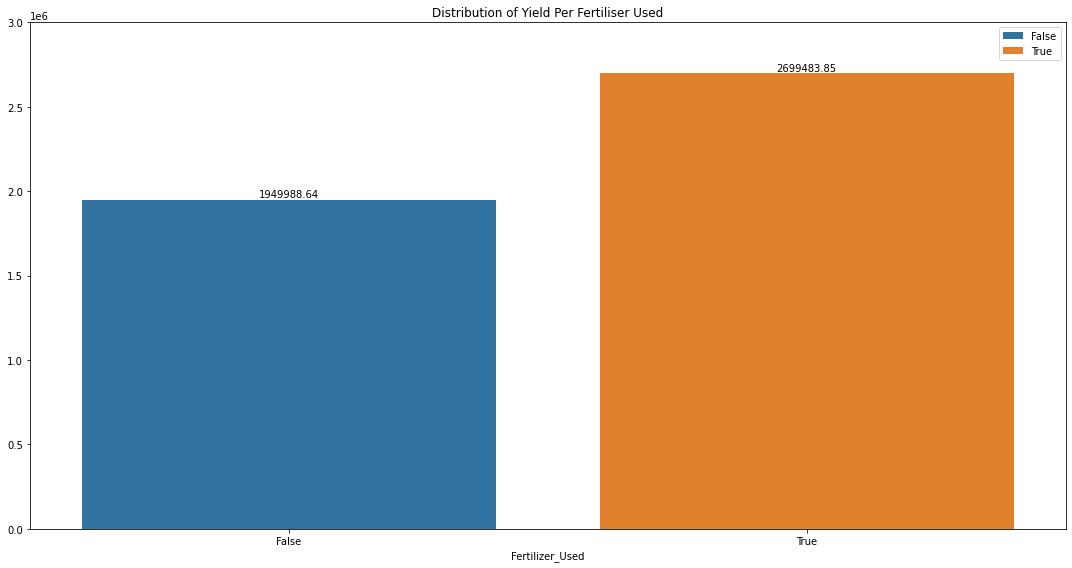

In [14]:
# Set up the figure and group the data by "Fertilizer_Used" to calculate total yield.
plt.figure(figsize=(15,8))
grouped_fertiliser = data.groupby("Fertilizer_Used")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per fertilizer used and add labels on each bar.
plot = sns.barplot(y=grouped_fertiliser.values, x=grouped_fertiliser.index, dodge=False, hue=grouped_fertiliser.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Fertiliser Used")
plt.legend(loc="upper right")
plt.ylim(0, 3000000)

# Adjust the layout for a clean presentation of the plot.
plt.tight_layout()

# Display the plot.
plt.show()

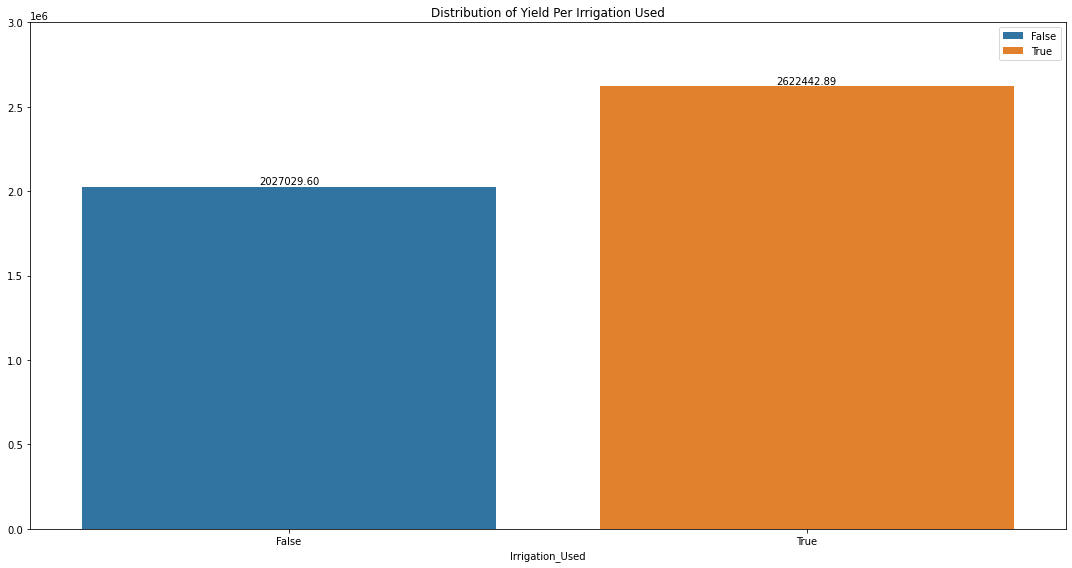

In [15]:
# Set up the figure and group the data by "Irrigation_Used" to calculate total yield.
plt.figure(figsize=(15,8))
grouped_irrigation = data.groupby("Irrigation_Used")["Yield_tons_per_hectare"].sum()

# Create a bar plot for total yield per irrigation used and add labels on each bar.
plot = sns.barplot(y=grouped_irrigation.values, x=grouped_irrigation.index, dodge=False, hue=grouped_irrigation.index)
for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

# Set the title, legend, and y-axis limit for better visualization.
plt.title("Distribution of Yield Per Irrigation Used")
plt.legend(loc="upper right")
plt.ylim(0, 3000000)

# Adjust the layout for a clean presentation of the plot.
plt.tight_layout()

# Display the plot.
plt.show()

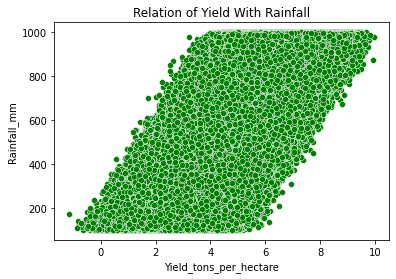

In [16]:
# Create a scatter plot to visualize the relationship between yield and rainfall.
sns.scatterplot(x=data["Yield_tons_per_hectare"], y=data["Rainfall_mm"], color="green")

# Set the title of the plot.
plt.title("Relation of Yield With Rainfall")

# Display the plot.
plt.show()

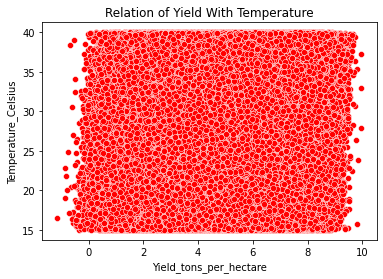

In [17]:
# Create a scatter plot to visualize the relationship between yield and temperature.
sns.scatterplot(x=data["Yield_tons_per_hectare"], y=data["Temperature_Celsius"], color="red")

# Set the title of the plot.
plt.title("Relation of Yield With Temperature")

# Display the plot.
plt.show()

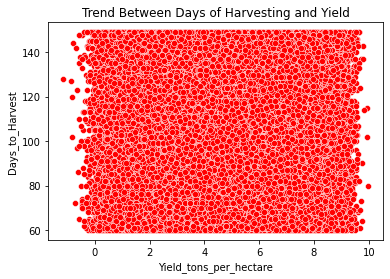

In [18]:
# Create a scatter plot to visualize the trend between days to harvest and yield.
sns.scatterplot(x=data["Yield_tons_per_hectare"], y=data["Days_to_Harvest"], color="red")

# Set the title of the plot.
plt.title("Trend Between Days of Harvesting and Yield")

# Display the plot.
plt.show()

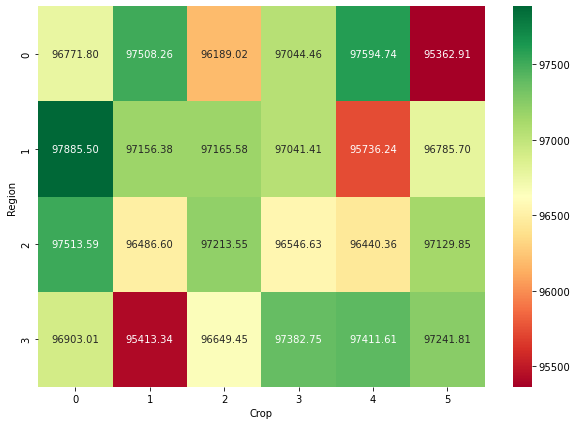

In [24]:
# Set up the figure size for the heatmap.
plt.figure(figsize=(10,7))

# Create a pivot table to calculate total yield per crop by region.
pivot = pd.pivot_table(data, values="Yield_tons_per_hectare", index="Region", columns="Crop", aggfunc="sum")

# Create a heatmap to visualize the yield distribution with annotations.
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='RdYlGn')
# Display the heatmap.
plt.savefig(r"C:\Users\Dell\Pictures\rp\pivottable.eps", dpi=300, bbox_inches='tight')
plt.show()

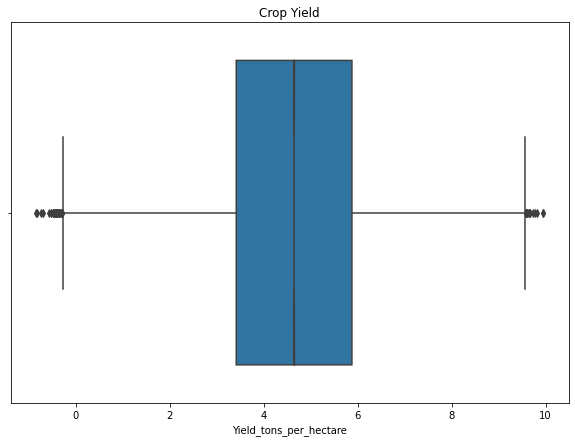

In [23]:
plt.figure(figsize=(10,7))
# Create a box plot to visualize the distribution of crop yield.
sns.boxplot(x=data["Yield_tons_per_hectare"], notch=True)

# Set the title of the plot.
plt.title("Crop Yield")

# Display the plot.
plt.savefig(r"C:\Users\Dell\Pictures\rp\boxplot.eps", dpi=300, bbox_inches='tight')
plt.show()

# DATA PREPROCESSING

In [18]:
# Initialize the LabelEncoder for categorical feature transformation.
encoder = LabelEncoder()

# Encode categorical variables into numerical format.
data["Crop"] = encoder.fit_transform(data["Crop"])
data["Region"] = encoder.fit_transform(data["Region"])
data["Weather_Condition"] = encoder.fit_transform(data["Weather_Condition"])
data["Soil_Type"] = encoder.fit_transform(data["Soil_Type"])
data["Fertilizer_Used"] = encoder.fit_transform(data["Fertilizer_Used"])
data["Irrigation_Used"] = encoder.fit_transform(data["Irrigation_Used"])

In [19]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
987231,3,5,1,714.854403,23.875872,0,0,2,120,3.840988
79954,1,0,1,860.604672,23.070897,0,0,1,78,5.138173
567130,1,4,0,802.081954,24.020125,1,1,1,140,6.401523
500891,3,0,1,203.616909,16.895211,0,1,2,96,2.658805
55399,0,5,3,510.528102,18.402903,0,1,0,65,2.797703


### SAMPLING THE DATA

In [8]:
data=data.sample(frac=0.5,random_state=42)

# FEATURE EXTRACTION

#### CORRELATION MATRIX

In [20]:
# Separate the features from the target variable in the dataset.
features=data.drop("Yield_tons_per_hectare",axis=1)
target=data["Yield_tons_per_hectare"]

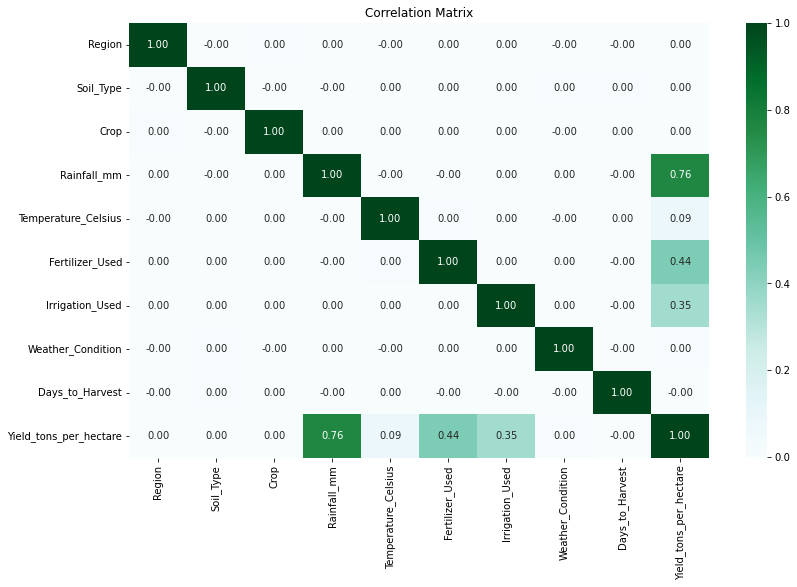

In [21]:
# Set up the figure size for the correlation matrix heatmap.
plt.figure(figsize=(13,8))

# Create a heatmap to visualize the correlation matrix with annotations.
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='BuGn')

# Set the title of the heatmap.
plt.title("Correlation Matrix")

# Display the heatmap.
plt.savefig(r"C:\Users\Dell\Pictures\rp\correlation.eps", dpi=300, bbox_inches='tight')
plt.show()

#### MUTUAL INFORMATION GAIN

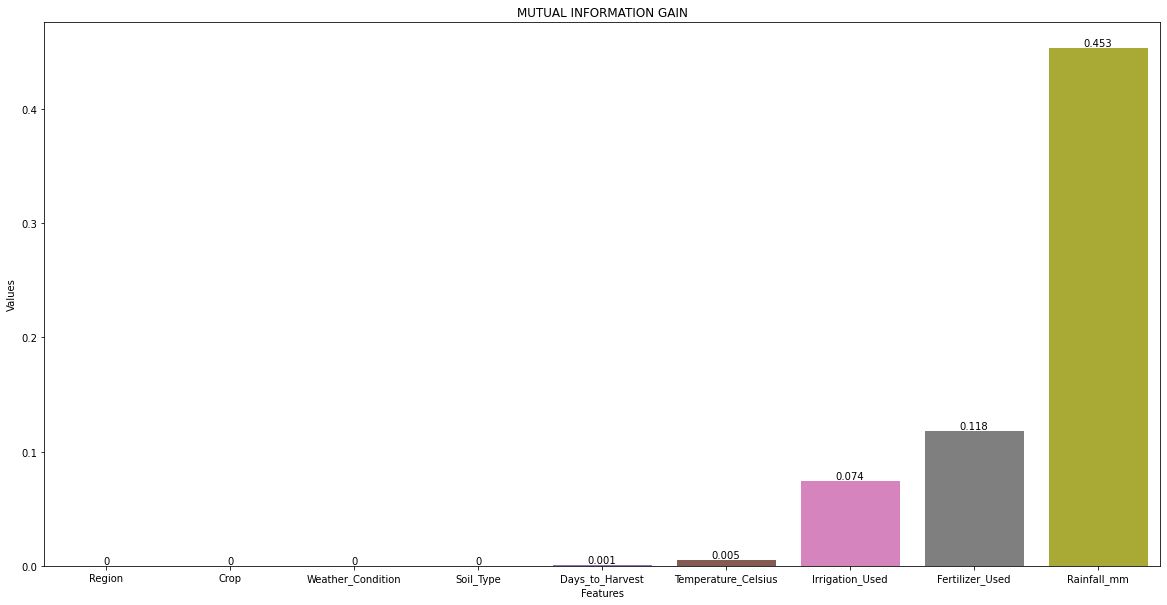

In [25]:
# Set up the figure size for the mutual information gain bar plot.
plt.figure(figsize=(20,10))

# Calculate mutual information regression values between features and target.
values = mutual_info_regression(features, target)
mutual_info = pd.Series(values)

# Assign feature names to the mutual information series.
mutual_info.index = features.columns

# Create a DataFrame to hold features and their corresponding mutual information values.
df = pd.DataFrame({"Features": mutual_info.index, "Values": mutual_info})

# Sort the DataFrame by mutual information values in ascending order.
df.sort_values(ascending=True, by="Values", inplace=True)

# Round the values for better readability.
df["Values"] = df["Values"].round(3)

# Create a bar plot to visualize mutual information gain for each feature.
bar = sns.barplot(x="Features", y="Values", data=df)
bar.bar_label(bar.containers[0])  

# Set the title of the plot.
plt.title("MUTUAL INFORMATION GAIN")

# Display the plot.
plt.savefig(r"C:\Users\Dell\Pictures\rp\mutual_info.eps", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
features=data[["Rainfall_mm","Temperature_Celsius","Fertilizer_Used","Irrigation_Used"]]

# MODEL BUILDING

### ANN

In [27]:
# Split the dataset into training and testing sets (70% train, 30% test).
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the StandardScaler for feature scaling.
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Sequential model for the neural network.
model = Sequential()

# Add input layer and hidden layers with ReLU activation.
model.add(Input(shape=(X_train_scaled.shape[1],)))  
model.add(Dense(units=128, activation='relu')) 
model.add(Dense(units=64, activation='relu'))   
model.add(Dense(units=32, activation='relu'))    
model.add(Dense(units=16, activation='relu'))    

# Add output layer with a single unit for regression.
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss.
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the summary of the model architecture.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

### LINEAR REGRESSION, DECISION TREE REGRESSOR

In [28]:
# Initialising Linear Regression with L1 regularisation
lr_model=Lasso(alpha=0.2)
# Initialising Decision Tree Regressor
dt_model=DecisionTreeRegressor()

# TRAINING AND TESTING THE MODEL

### ANN

In [33]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
# Predict on the test set
y_pred = model.predict(X_test)

Epoch 1/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 1.0978 - val_loss: 0.2750
Epoch 2/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2860 - val_loss: 0.3173
Epoch 3/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.2703 - val_loss: 0.2551
Epoch 4/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2662 - val_loss: 0.2541
Epoch 5/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2637 - val_loss: 0.2931
Epoch 6/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2619 - val_loss: 0.2504
Epoch 7/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2614 - val_loss: 0.2636
Epoch 8/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2610 - val_loss: 0.2642
Epoch 9/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2614 - val_loss: 0.2541
Epoch 10/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2587 - val_loss: 0.2576
Epoch 11/20
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.2597 - val_loss: 0.25

### LINEAR REGRESSION

In [29]:
# Train the model
lr_model.fit(X_train_scaled,y_train)
# Predict on the test set
y_pred_lr=lr_model.predict(X_test_scaled)

### DECISION TREE REGRESSOR

In [30]:
# Train the model
dt_model.fit(X_train_scaled,y_train)
# Predict on the test set
y_pred_dt=dt_model.predict(X_test_scaled)

# MODEL EVALUATION

### ANN

In [34]:
# Mean Squared Error Calculation 
mse_ann=mean_squared_error(y_test,y_pred)
# R-Squared Score Calculation
rscore_ann=r2_score(y_pred,y_test)
print("MSE of ANN: ",round(mse_ann,2))
print("R-Squared Score of ANN: ",round(rscore_ann,2))

MSE of ANN:  0.25
R-Squared Score of ANN:  0.91


### LINEAR REGRESSION

In [31]:
# Mean Squared Error Calculation
mse_lr=mean_squared_error(y_test,y_pred_lr)
# R-Squared Score Calculation
rscore_lr=r2_score(y_pred_lr,y_test)
print("MSE of Linear Regression: ",round(mse_lr,2))
print("R-Squared Score of Linear Regression: ",round(rscore_lr,2))

MSE of Linear Regression:  0.39
R-Squared Score of Linear Regression:  0.76


### DECISION TREE REGRESSOR

In [32]:
# Mean Squared Error Calculation
mse_dt=mean_squared_error(y_test,y_pred_dt)
# R-Squared Score Calculation 
rscore_dt=r2_score(y_pred_dt,y_test)
print("MSE of Decision Tree Regressor: ",round(mse_dt,2))
print("R-Squared Score of Decision Tree Regressor: ",round(rscore_dt,2))

MSE of Decision Tree Regressor:  0.51
R-Squared Score of Decision Tree Regressor:  0.82


# VISUALIZATION OF KEY EVALUATIONS

# MSE & R2

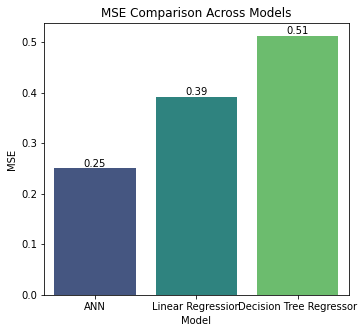

In [39]:
# Create a DataFrame to store the results of model evaluation metrics.
results_df = pd.DataFrame({
    'Model': ['ANN', 'Linear Regression', 'Decision Tree Regressor'],  
    'MSE': [mse_ann, mse_lr, mse_dt],  
    'R²': [rscore_ann, rscore_lr, rscore_dt]  
})

# Set up the figure size for the comparison plots.
plt.figure(figsize=(12, 5))

# Create the first subplot for MSE comparison.
plt.subplot(1, 2, 1)
mse_plot = sns.barplot(x='Model', y='MSE', data=results_df, palette="viridis")
plt.title('MSE Comparison Across Models')  
for container in mse_plot.containers:
    mse_plot.bar_label(container, fmt="%.2f")  
    
plt.savefig(r"C:\Users\Dell\Pictures\rp\mse.eps", dpi=300, bbox_inches='tight')
plt.show()

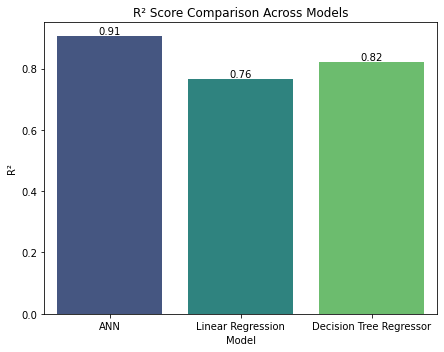

In [41]:
plt.figure(figsize=(12,5))
# Create the second subplot for R² score comparison.
plt.subplot(1, 2, 2)
r2_plot = sns.barplot(x='Model', y='R²', data=results_df, palette="viridis")
plt.title('R² Score Comparison Across Models')  
for container in r2_plot.containers:
    r2_plot.bar_label(container, fmt="%.2f")  

# Adjust layout to prevent overlap.
plt.tight_layout()

# Display the comparison plots.
plt.savefig(r"C:\Users\Dell\Pictures\rp\r2_score.eps", dpi=300, bbox_inches='tight')
plt.show()

### ACTUAL VS PREDICTED 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


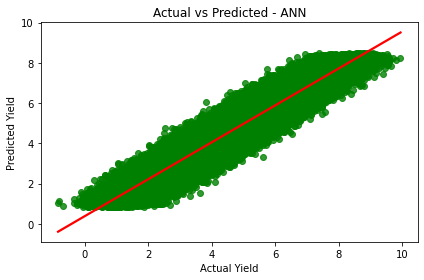

In [42]:
# Create a regression plot to visualize actual vs predicted values for the ANN model.
sns.regplot(x=y_test, y=y_pred, line_kws=dict(color="r"), scatter_kws=dict(color="green"))
plt.title("Actual vs Predicted - ANN")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.tight_layout()  
plt.savefig(r"C:\Users\Dell\Pictures\rp\actual_vs_pred.eps", dpi=300, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


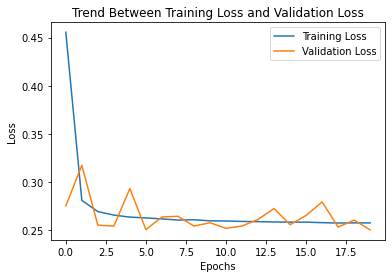

In [43]:
# Plot training and validation loss over epochs to visualize model performance.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Trend Between Training Loss and Validation Loss")
plt.savefig(r"C:\Users\Dell\Pictures\rp\loss.eps", dpi=300, bbox_inches='tight')
plt.show()